# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

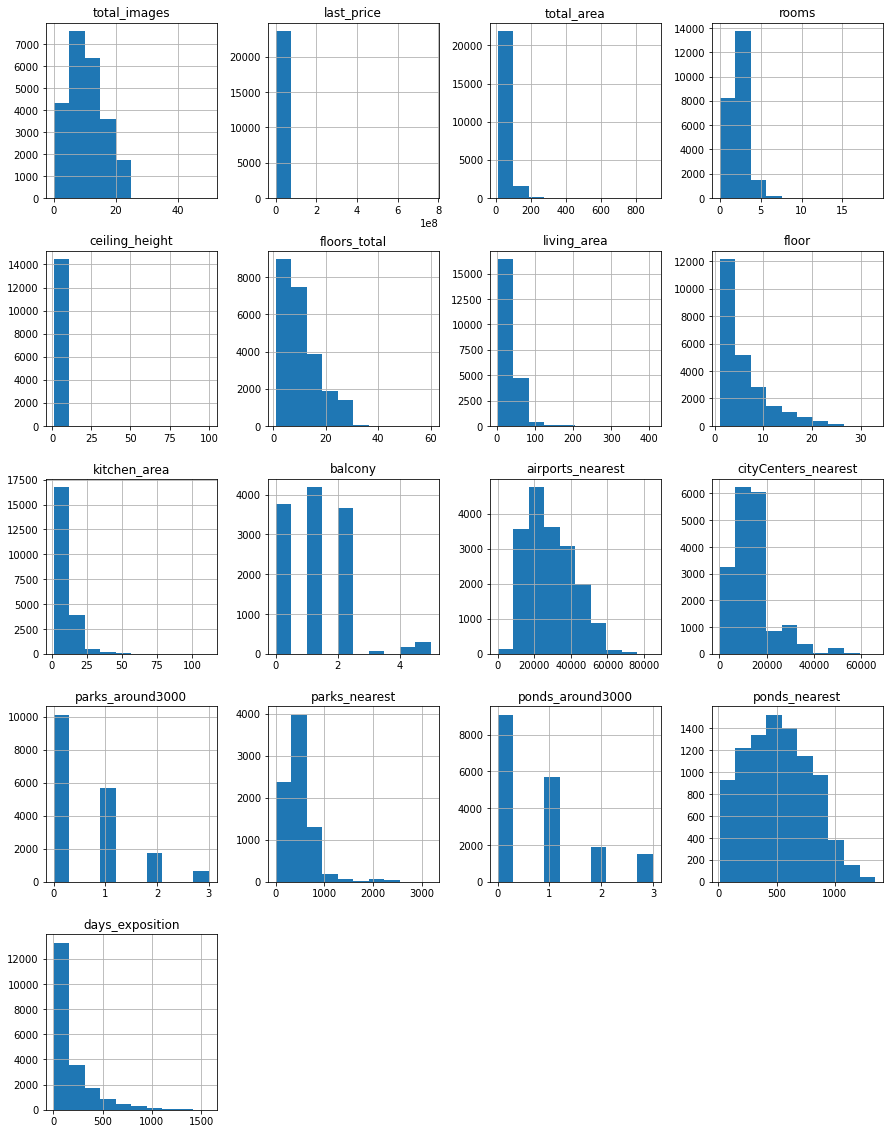

In [2]:
data.hist(figsize=(15, 20))

После первичного просмотра данных сразу можно заметить столбцы с большим количеством пропусков и типом данных которые можно заменить на более удобные. Всего у нас 21 столбец в кажом из которых долно быть 23699 элементов. 

### Предобработка данных

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В глаза бросается большое количество пропусков, особенно в столбце 'is_apartment'. Нужно выяснить сколько пропусков в каждом столбце таблице и понять как с ними бороться. 

In [4]:
data['is_apartment'].isnull().sum()

20924

Из 23699 строчек, 20924 - пустые. Очевидно, что причина такого количества пропущенных значений - это некачественное заполнение. Возможно не все при заполнении данных понимали является ли данная недвижимость аппартаментами. Заменим все пропущенные значения на False.  

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
#Пропуски в нескольких столбцах можно заменить на 0
data['balcony'] = data['balcony'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски в days_exposition и balcony ликвидированы

In [7]:
#Поменяем тип данных в этих столбцах на более удобный - int
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
#Заменим тип данных на более удобный - int
data['last_price'] = data['last_price'].astype('int')

В столбце "first_day_exposition" данные дающие информацию о дате, но в местах где должны быть информация о точном времени везде стоят нули. Для лучшего вида, заменим тип данных на дату без точного времени. 

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


В остальных столбцах нет возможности заменить данные на более удобные или корректные, поэтому оставляем их как есть, чтобы не создать новых проблем и неточностей при дальнейшей работе с данными.

In [10]:
#Выведем количество различных названий населенных пунктов
data['locality_name'].value_counts().count()

364

In [11]:
#Попробуем устранить неявные дубликаты в названиях населенных пунктов
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
#выведем количество различных названий населенных пунктов после удаления неявных дубликатов 
data['locality_name'].value_counts().count()

322

Таким образом нам удалось избавиться от 42 неявных дубликатов. Теперь попробуем выявить аномальные значения. 

In [12]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Максимальное значение - 60, хотя таких высоких домов в Питере нет. Устраним аномальные значения в этом столбце.

In [13]:
data['floors_total'].loc[data['floors_total'] > 30]

397      36.0
871      35.0
1060     35.0
1697     34.0
1917     35.0
2253     60.0
2966     35.0
4855     35.0
5749     35.0
5807     36.0
5808     35.0
7236     35.0
8496     35.0
9186     35.0
9370     35.0
9579     35.0
11079    36.0
11575    33.0
12888    35.0
12960    35.0
13975    35.0
14347    35.0
15982    35.0
16731    52.0
16934    37.0
18218    35.0
18617    35.0
18629    35.0
20938    35.0
21599    35.0
21809    35.0
22946    35.0
Name: floors_total, dtype: float64

35 этажей - реальная цифра, а вот 60 и 52 уже перебор. Заменим это значение на среднее. 

In [14]:
anomal_index_floor = data['floors_total'].loc[data['floors_total'] > 40].index
for index in anomal_index_floor:
    data['floors_total'][index] = data['floors_total'].mean()
data['floors_total'].describe()

/tmp/ipykernel_141/2116334490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'][index] = data['floors_total'].mean()


count    23613.000000
mean        10.669985
std          6.583867
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

Аномальное количество этажей ликвидировано

In [15]:
data['rooms'].loc[data['rooms'] > 10]

648      11
866      14
5358     15
9688     11
14498    19
18848    16
19540    12
20829    14
Name: rooms, dtype: int64

Количество комнат больше 10 - это аномалия. Заменим такие большие значения на медиану

In [16]:
anomal_index_rooms = data['rooms'].loc[data['rooms'] > 10].index
for index in anomal_index_rooms:
    data['rooms'][index] = data['rooms'].mean()
data['rooms'].describe()

/tmp/ipykernel_141/1130424838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rooms'][index] = data['rooms'].mean()


count    23699.000000
mean         2.066585
std          1.054849
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

Аномальные значения в столбце с количеством комнат устранены.

In [17]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Можно заметить, что максимальное и минимальное значения - аномальны, что говорит о возможных ошибках при заполнении данных.

In [18]:
data['ceiling_height'].loc[data['ceiling_height'] > 20]

355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

In [19]:
#Очевидно, что проблема произошла из-за неправильного заполнения и вместо, например, 2.7 было добавлено 27. 
anomal_index_too_big = data['ceiling_height'].loc[data['ceiling_height'] > 20].index
anomal_index_too_small = data['ceiling_height'].loc[data['ceiling_height'] < 2].index
for index in anomal_index_too_big:
    data['ceiling_height'][index] = data['ceiling_height'][index] / 10

/tmp/ipykernel_141/4010824604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'][index] = data['ceiling_height'][index] / 10


In [20]:
data['ceiling_height'].loc[data['ceiling_height'] < 2]

5712     1.20
16934    1.75
22590    1.00
Name: ceiling_height, dtype: float64

In [21]:
#Так как аномальных значений меньше 2 - немного, можем заменить их на медианное значение.
#Также заменим значение из строки 22869. Потому что оно было введено по ошибке.
for index in anomal_index_too_small:
    data['ceiling_height'][index] = data['ceiling_height'].mean()

/tmp/ipykernel_141/940734623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'][index] = data['ceiling_height'].mean()


In [22]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.731141
std          0.349853
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

In [23]:
data['ceiling_height'].loc[(data['ceiling_height'] > 10) & (data['ceiling_height'] < 21)]

15061    14.0
17496    20.0
22309    10.3
Name: ceiling_height, dtype: float64

In [24]:
anomal_index_middle = data['ceiling_height'].loc[(data['ceiling_height'] > 10) & (data['ceiling_height'] < 21)]
for index in anomal_index_middle:
    data['ceiling_height'][index] = data['ceiling_height'].mean()

/tmp/ipykernel_141/3673169330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'][index] = data['ceiling_height'].mean()
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
data['ceiling_height'].describe()

count    14505.000000
mean         2.731143
std          0.349841
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

Аномальные значения в колонке 'ceiling_height' были исправлены на значения, которые серьезно не повлияют на результаты исследования.  

**Вывод:** В результате предобработки были устранены следующие проблемы:

1. В столбцах, где это возможно, были заполнены пустые значения. 

2. В ряде столбцов тип данных был изменен на более удобный.

3. Были устранены неявные дубликаты в столбце с названиями населенных пунктов.

4. Были исследованы и ликвидированы аномальные значения в столбце с высотой потолков.

5. Были ликвидированы ненормальные для Санкт-Петербурга значения общей этмажности дома. 

6. Были исследованы и ликвидированы аномальные значения в столбце с общим количеством комнат.

### Проведите исследовательский анализ данных

In [26]:
#Цена квадратного метра
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 1)
#День, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#Категоризируем тип этажа
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'
#Расстояние до центра в км
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14505 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

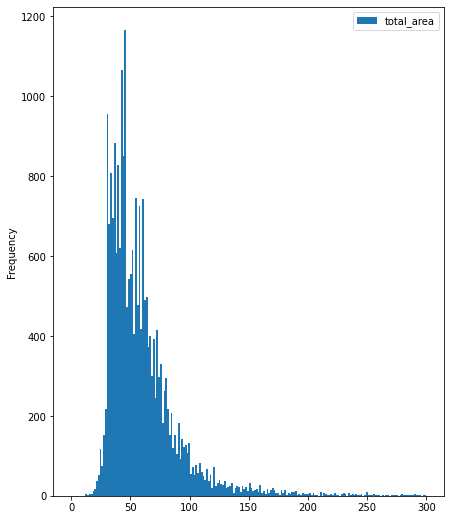

In [27]:
#Изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 200, figsize = (7,9), range = (0,300))
data['total_area'].describe()

При помощи гистограммы можно заметить, что распределение данных - нормальное. Так же основные данные указывают на то, что среднее значение - 60кв.м.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

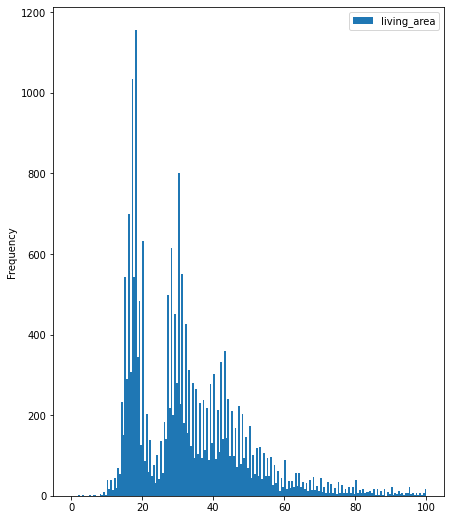

In [28]:
#Изучим жилую площадь
data.plot(y = 'living_area', kind = 'hist', bins = 200, figsize = (7,9), range = (0,100))
data['living_area'].describe()

Из гистограммы видно два пика частотности которые находятся в районе значений 17 и 30. Средняя площадь жилой зоны - это 34 кв.м.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

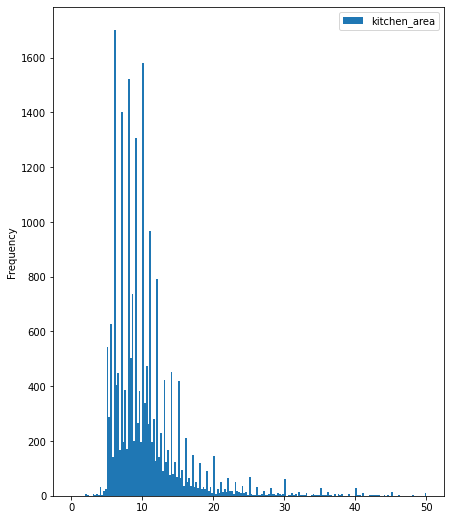

In [29]:
#Изучим площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 200, figsize = (7,9), range = (0,50))
data['kitchen_area'].describe()

Средняя площадь кухни - 10 кв.м.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

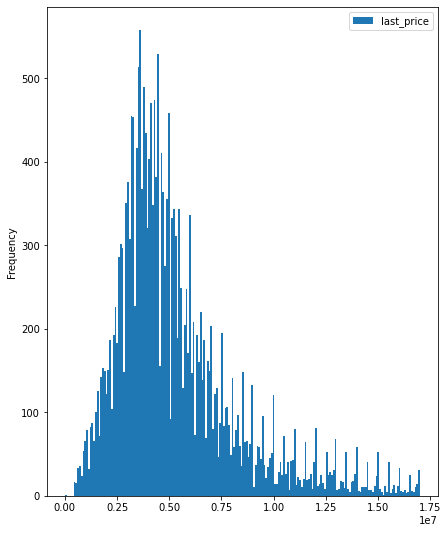

In [30]:
#Изучим цену объектов 
data.plot(y = 'last_price', kind = 'hist', bins = 200, figsize = (7,9), range = (0, 17000000))
data['last_price'].describe()

У цен на объекты нормальное распределение, а медианное значение ~4.6 миллионов рублей. Мы берем медианное значение для того чтобы выбросы сильно не влияли на оценку центрального значения.

count    23699.000000
mean         2.066585
std          1.054849
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

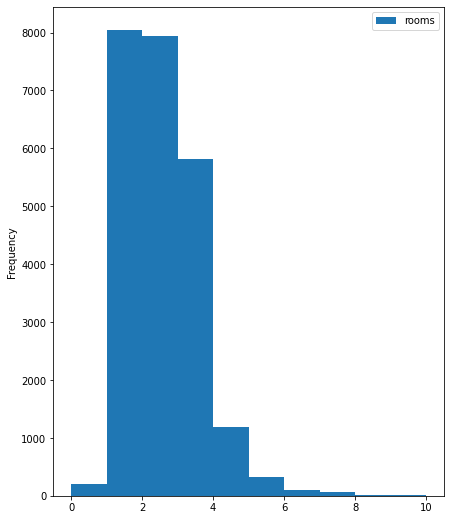

In [31]:
#Изучим количество комнат
data.plot(y = 'rooms', kind = 'hist', bins = 10, figsize = (7,9))
data['rooms'].describe()

Из гистограммы видно, что большинство квартир имеют 2 или 3 комнаты. 

count    14505.000000
mean         2.731143
std          0.349841
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

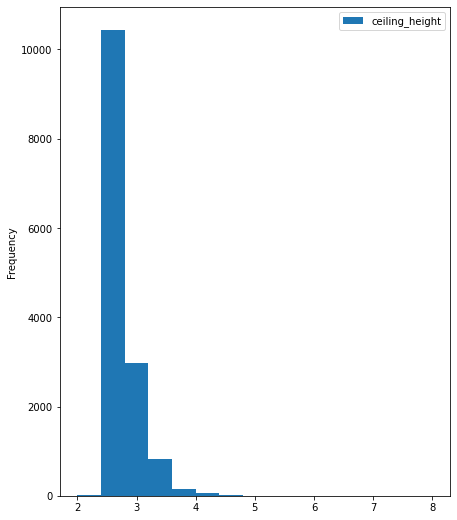

In [32]:
#Изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 15, figsize = (7,9), range = (2,8))
data['ceiling_height'].describe()

В основном высота потолков в квартирах варьируется от 2.5 до 3.5 метров.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

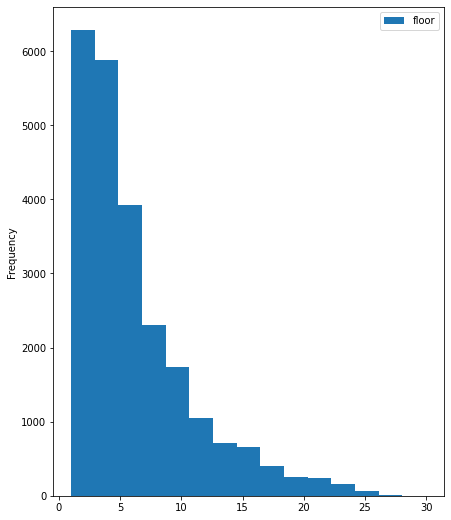

In [33]:
#Изучим этажи объектов
data.plot(y = 'floor', kind = 'hist', bins = 15, figsize = (7,9), range = (1,30))
data['floor'].describe()

Можно заметить что объектов на низких этажах больше, чем на высоких. Среднее значение этажа объектов - 5.9. 

<AxesSubplot:xlabel='floor_category'>

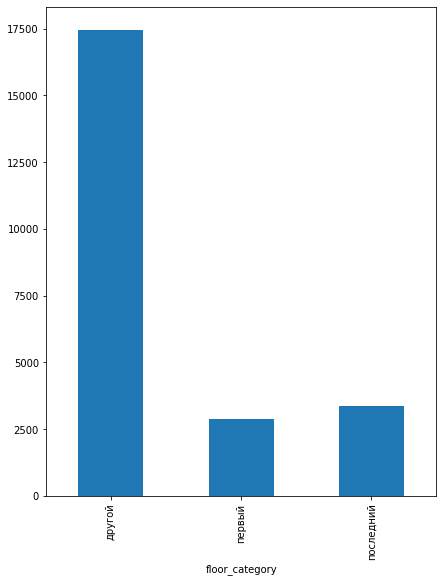

In [34]:
#Изучим типы этажей объектов
data.groupby('floor_category')['floor_category'].count().plot(y = 'floor', kind = 'bar', figsize = (7, 9))

На графике представлено распределение по категориям этажей. Очевидно, что преобладает категория "другой", но мы видим, что две другие категории тоже значительны. 

count    23613.000000
mean        10.669985
std          6.583867
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

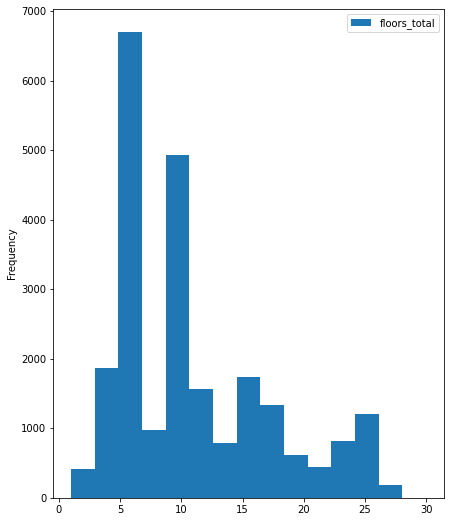

In [35]:
#Изучим общее количество этажей в домах, где находятся объекты
data.plot(y = 'floors_total', kind = 'hist', bins = 15, figsize = (7,9), range = (1,30))
data['floors_total'].describe()

Среднее количесво этажей в домах - 10.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

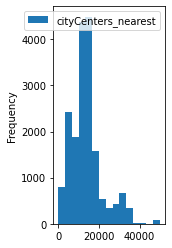

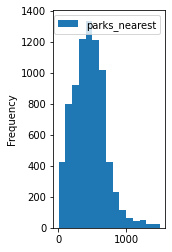

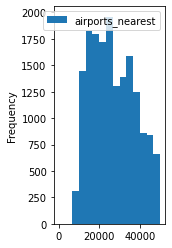

In [36]:
#Изучим расстояние до центра, ближайшего парка и аэропорта
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 15, figsize = (2,4), range = (1,50000))
data.plot(y = 'parks_nearest', kind = 'hist', bins = 15, figsize = (2,4), range = (1,1500))
data.plot(y = 'airports_nearest', kind = 'hist', bins = 15, figsize = (2,4), range = (1,50000))
data['parks_nearest'].describe()

Среднестатистическая квартира находиться на расстоянии 14км от центра и 28км от аэропорта, а также имеет парк в 490 метрах. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,floor_category,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0,120370.4,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81,82920.8,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558,92785.7,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424,408176.1,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,100000.0,1,6,2018,другой,8.0


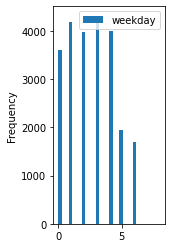

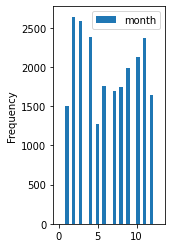

In [37]:
#Изучим дни и месяца публикации объявлений
data.plot(y = 'weekday', kind = 'hist', bins = 30, figsize = (2,4), range = (0,8))
data.plot(y = 'month', kind = 'hist', bins = 30, figsize = (2,4), range = (0,13))
data.head()

Из первого графика видно, что объявления в выходные публикуются значительно реже чем в будние дни. из второго, что самые непопулярные месяца для выставления объявления - декабрь, январь, май, а самый популярные - февраль, март и апрель.  

**Вывод:** 

Были использованы различные инструменты для анализа и визулизации данных. Можно составить приблизительный портрет квартиры в Санкт-Петербурге и Ленинградской области. 

Средняя квартира находиться на 6ом этаже 10-этажного дома, расположенного на расстоянии 14км от центра и 28км от аэропорта, имеет 2 комнаты и потолки высотой 2.5 метра. Площадь такой квартиры 60 кв.м, из которых 34 кв.м - это жилая зона, а 10 кв.м - кухня. Цена такой "средней" квартиры 4.6 миллионов рублей. 

Публикация объявлений чаще всего происходит в конце зимы - начале весны, а реже всего в начале зимы, конце весны и летом. Также это как правило будние дни.

Стоит отметить, что у цены в регионе нормальное распределение. Это означает, что квартир с ценой близкой к средней больше, чем квартир, которые сильно дешевле или дороже среднего. Возможно это связано с тем, что квартиры в среднем ценовом диапозоне - самые востребованные, потому что подходят наибольшему количеству покупателей. 

**Изучим время продажи квартир. Исследовать будем столбец "days_exposition".**

0       3181
45       880
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

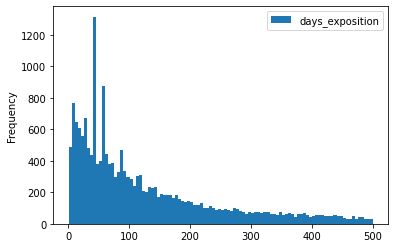

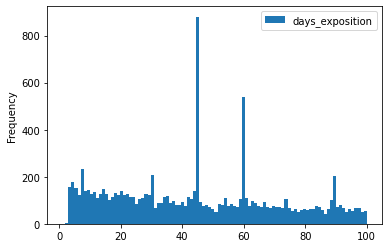

In [38]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, range = (1,500))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, range = (1,100))
data['days_exposition'].describe()
data['days_exposition'].value_counts()

Среднее значение - 156 дней. Медианное значение - 74 дня. Обычно квартиры продаются за 20-150 дней, но так же в достаточно большом количестве случаев продажа квартиры может ратянуться на больший срок.

На гиcтограмме видны выбросы, значения этих выбросов - это 45, 60, 7, 30 дней. Это означает, что после этого срока люди чаще всего снимают объявления. Это может быть связано как с техническими сбоями, так и с правилами платформы, на которой выставлялись объявления.

Быстрыми продажами можно считать продажи до недели, а долгими больше года. 

**Изучим зависимость полной стоимости квартиры от различных параметров**

                 median
total_area             
12.0          2400000.0
13.0          1850000.0
13.2          1686000.0
14.0          1190000.0
15.0          1725000.0
...                 ...
590.0        65000000.0
618.0       300000000.0
631.0       140000000.0
631.2       140000000.0
900.0       420000000.0

[2182 rows x 1 columns]


0.6536750579657242

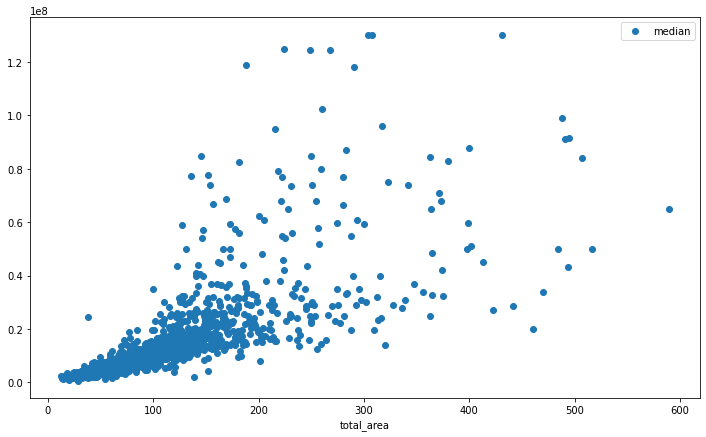

In [39]:
#Рассмотрим зависимость от общей площади
pivot_table_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])
pivot_table_area.columns = ['median']
pivot_table_area.query('median < 140000000.00').plot(y = 'median',style = 'o', figsize = (12, 7))
print(pivot_table_area)
#Для полноты картины посчитаем корреляцию 
data['total_area'].corr(data['last_price'])

Можно сделать вывод, что зависимость стоимости объекта от общей площади есть, но не очень большая. Исходя из посчитанной корреляции видно, что у этих двух параметров умеренная положительная связь. 

0.5664915336952651

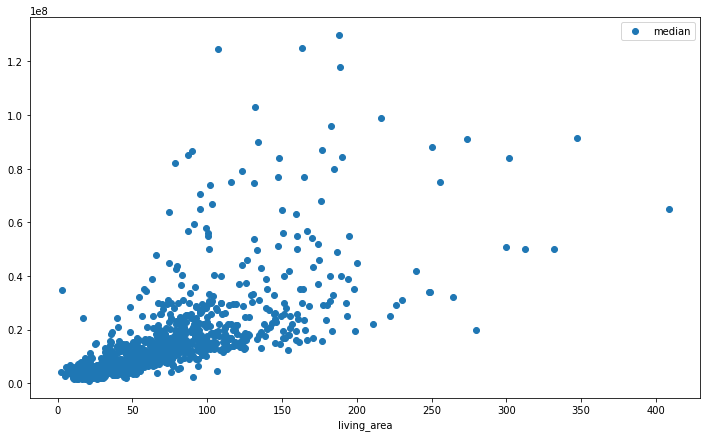

In [40]:
#Рассмотрим зависимость от жилой площади
pivot_table_liv_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['median'])
pivot_table_liv_area.columns = ['median']
pivot_table_liv_area.query('median < 140000000.00').plot(y = 'median',style = 'o', figsize = (12, 7))
#Для полноты картины посчитаем корреляцию 
data['living_area'].corr(data['last_price'])

Зависимость стоимости объекта от жилой площади похожа на зависимость от общей площади, что логично, но эта зависимость меньше исходя из посчитанного коэффицента корреляции, который равен 0.566491.

0.5198690130216392

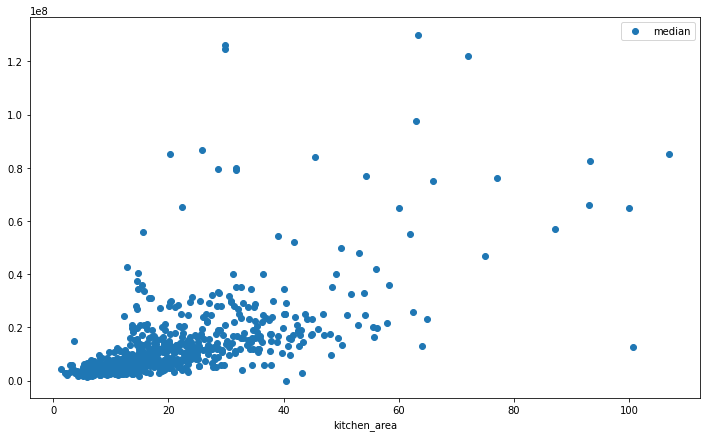

In [41]:
#Рассмотрим зависимость от площади кухни
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
pivot_table_kitchen_area.columns = ['median']
pivot_table_kitchen_area.query('median < 140000000.00').plot(y = 'median',style = 'o', figsize = (12, 7))
#Для полноты картины посчитаем корреляцию 
data['kitchen_area'].corr(data['last_price'])

Зависимость стоимости объекта от площади кухни похожа на зависимость от общей площади, но коэффицент корреляции меньше, что может говорить о более слабой зависимости.

<AxesSubplot:xlabel='rooms'>

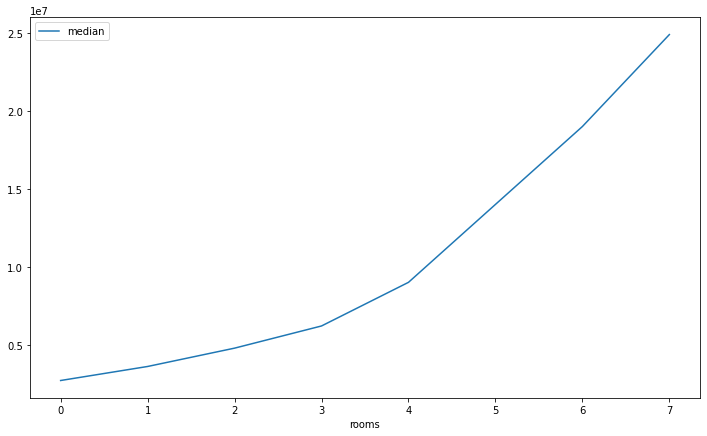

In [42]:
#Рассмотрим зависимость от количества комнат
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'median'])
pivot_table_rooms.columns = ['count', 'median']
pivot_table_rooms.query('count > 20').plot(y = 'median', figsize = (12, 7))

Из построенного графика видно, что полная стоимость квартиры зависит от количества комнат. Скорее всего это связано с тем, что в большинстве случаев, чем больше комнат, тем больше общая площадь квартиры, а значит и ее стоимость. 

<AxesSubplot:xlabel='floor_category'>

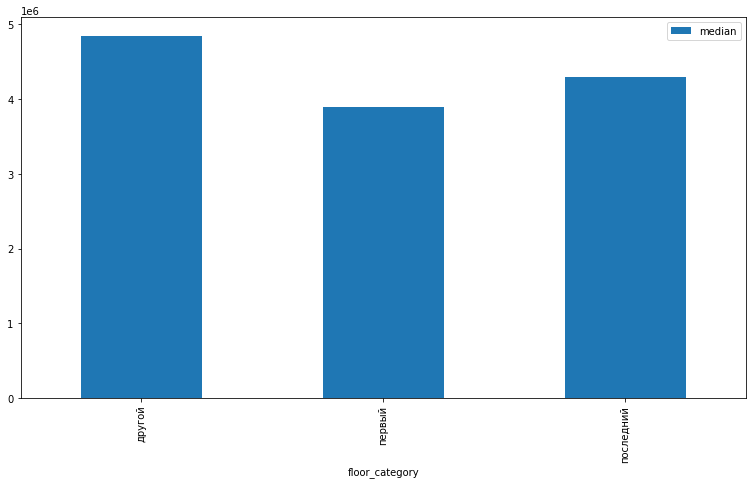

In [43]:
#Рассмотрим как зависит стоимость квартиры от типа этажа
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['median'])
pivot_table_floor_category.columns = ['median']
pivot_table_floor_category.plot(y = 'median',kind = 'bar',figsize = (13,7))

Из графика можно сделать вывод, что квартиры на первом этаже дешевле, чем на последнем и других этажах. Квартиры не на первом и не на последнем этажах в среднем стоят дороже.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


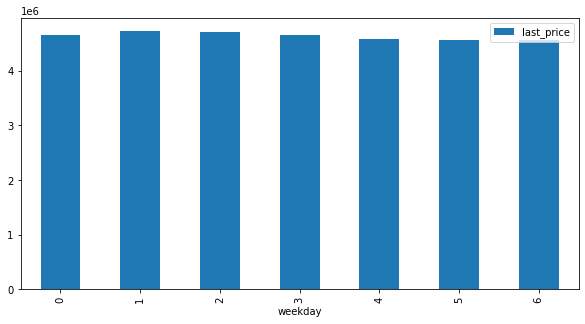

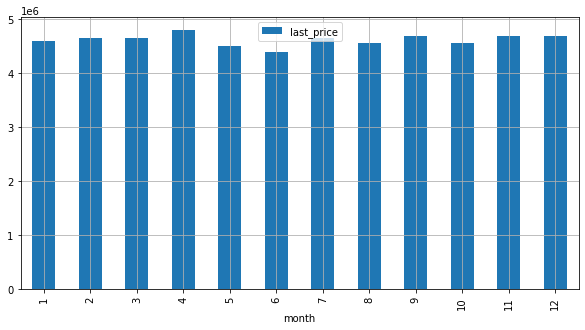

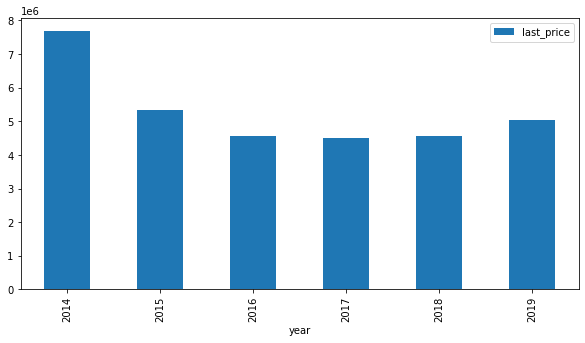

In [44]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['median'])
pivot_table_month_exposition = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
print(pivot_table_weekday_exposition.plot(y = 'median',kind = 'bar', figsize = (10,5)))
print(pivot_table_month_exposition.plot(y = 'median',kind = 'bar',grid = "True", figsize = (10,5)))
print(pivot_table_year_exposition.plot(y = 'median',kind = 'bar',figsize = (10,5)))

**День недели**

На графике хорошо видно, что стоимость объекта не зависит от дня недели в который этот объект выставили.

**Месяц**

На графике видно, что по самым низким ценам квартиры выставляют в мае и июне. Возможно это связано с тем, что спрос на квартиры падает на период отпусков. В связи с этим людям выставляющим квартиры в мае и июне приходиться понижать стоимость, чтобы найти клиентов. В остальные месяцы сильных отклонений по стоимости квартиры нет.

**Год**

Цены на квартиры были на высоком относительно других годов уровне в 2014. Это может быть связано с кризисом 2014 года. В 2015 году цены снизились и уже в 2016 вернулись к нормальному уровню, на котором они и остались до 2019 года. 

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим наибольшую и наименьшую**

In [45]:
#Выведем 10 населенных пунктов с наибольшим количеством объявлений
pivot_table_locality = data.pivot_table(index = 'locality_name', values = 'price_per_sqm', aggfunc=['count', 'mean'])
pivot_table_locality.columns = ['count', 'mean']
pivot_table_locality = pivot_table_locality.sort_values('count', ascending = False)
pivot_table_locality = pivot_table_locality.query('count > 210')
pivot_table_locality

,count,mean
locality_name,,
санкт-петербург,15721,114849.008956
поселок мурино,556,85681.761691
поселок шушары,440,78677.363636
всеволожск,398,68654.475628
пушкин,369,103125.818157
колпино,338,75424.581953
поселок парголово,327,90175.915291
гатчина,307,68746.147231
деревня кудрово,299,92473.546488


In [46]:
#Выделим населенные пункты с наибольшей и наименьшей средней стоимостью квардратного метра
print(pivot_table_locality[pivot_table_locality['mean']==pivot_table_locality['mean'].max()])
print(pivot_table_locality[pivot_table_locality['mean']==pivot_table_locality['mean'].min()])

                 count           mean
locality_name                        
санкт-петербург  15721  114849.008956
               count          mean
locality_name                     
выборг           237  58141.907173


Таким образом, наибольшая средняя стоимость квадратного метра в Санкт-Петербурге, тогда как наименьшая в Выборге. 

**Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра до центра.**

In [47]:
pivot_table_km = data.query('locality_name == "санкт-петербург"').pivot_table(
                            index = 'cityCenters_nearest_km', values = 'price_per_sqm', aggfunc = 'mean')
pivot_table_km

,price_per_sqm
cityCenters_nearest_km,
0.0,245833.533333
1.0,177005.408333
2.0,157849.007742
3.0,121387.456857
4.0,133282.872674
5.0,140509.789457
6.0,151012.194175
7.0,156176.880714
8.0,125671.441876


In [48]:
#Посчитаем среднюю стоимость одного километра в пределах Санкт_Петербурга
cnt = pivot_table_km['price_per_sqm'].count()
avg_price_per_km = (pivot_table_km['price_per_sqm'][0] - pivot_table_km['price_per_sqm'][29]) / cnt
avg_price_per_km

5762.672222222222

<AxesSubplot:xlabel='cityCenters_nearest_km'>

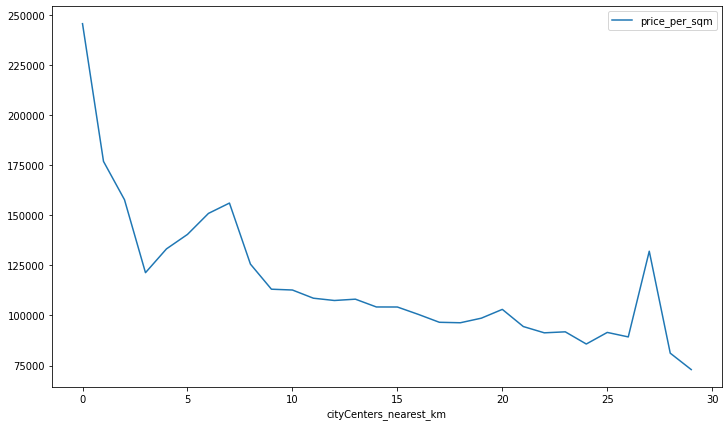

In [49]:
pivot_table_km.plot(y = 'price_per_sqm', figsize = (12, 7))

Мы вычислили среднюю цену квартиры для каждого километра и отобразили данные на графике. По этому графику видно, что самые высокие цены до 7-9 километров удаленности от центра города. Это связано с тем что эта область это центральная часть города. Также на этой удаленности от центра, как правило, лучше всего развита инфраструктура. Далее по мере удаления от центра цена падает. Причиной аномального пика в районе 27-28 километров может являться наличие премиального района на этой удаленности от центра города. Средней ценой одного километра является 5762.672р. 

### Общий вывод

Для анализа нам были предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В самом начале работы эти данные были изучены при помощи различных методов, были выявлены категории в которых можно было заполнить пропущенные значения и категории в которых это сделать было нельзя. Мною была произведена замена типа данных в местах, где это могло облегчить дальнейшую работу. Также были устранены неявные дубликаты и аномальные значения. 

Далее были выполнены действия, в результате которых в датасет были добавлены полезные данные:

1. Выполнено разбиение даты публикации на день, месяц и год

2. Для каждого объека определен тип этажа

3. Посчитана цена квадратного метра

4. Посчитано расстояние до центра в километрах

После предобработки и дополнения всех необходимых данных они были изучены и визуализированы при помощи графиков, что помогло выявить интересные закономерности:

**Общая площадь**. При помощи гистограммы можно заметить, что распределение данных - нормальное. Медианное значение - 60кв.м.

**Жилая площадь**. Из гистограммы видно два пика частотности которые находятся в районе значений 17 и 30. Средняя площадь жилой зоны - это 34 кв.м. 

**Площадь кухни**. Средняя площадь кухни - 10 кв.м.

**Цена объекта**. У цен на объекты нормальное распределение, а медианное значение ~4.6 миллионов рублей.

**Количество комнат**. Большинство квартир имеют 2 или 3 комнаты.

**Высота потолков**. В основном высота потолков в квартирах варьируется от 2.5 до 3.5 метров.

**Тип этажа**. Ранее данные о этаже на котором располагается квартира были категоризированы на Первый, Последний и Другие. И при изучении было выявлено, что квартиры на первом и последнем этажах составляют примерно 20% от общего количества квартир.

**Общее количество этажей**. Среднее количесво этажей в домах - 10.

**Расстояние до важных объектов**. Среднестатистическая квартира находиться на расстоянии 14км от центра и 28км от аэропорта, а также имеет парк в 490 метрах. 

**День и месяц публикации**. Объявления в выходные публикуются значительно реже чем в будние дни. Самые непопулярные месяцы для выставления объявления - декабрь, январь, май, а самый популярные - февраль, март и апрель.  

Благодаря этому анализу удалось составить портрет "средней" квартиры в регионе. Она находиться на 6ом этаже 10-этажного дома, расположенного на расстоянии 14км от центра и 28км от аэропорта, имеет 2 комнаты и потолки высотой 2.5 метра. Площадь такой квартиры 60 кв.м, из которых 34 кв.м - это жилая зона, а 10 кв.м - кухня. Цена такой "средней" квартиры 4.6 миллионов рублей.

<br/>
  
Первой задачей было **исследовать как быстро продавались квартиры и какие объявления висели долго, а какие нет**. Для этого мы изучили данные и построили графики для визуализации, что помогло нам придти к выводу, что обычно квартиры продаются за 20-150 дней, но так же в достаточно большом количестве случаев продажа квартиры может ратянуться на больший срок. На гиcтограмме видны выбросы, значения этих выбросов - это 45, 60, 7, 30 дней. Это означает, что после этого срока люди чаще всего снимают объявления. Это может быть связано как с техническими сбоями, так и с правилами платформы, на которой выставлялись объявления.
Быстрыми продажами можно считать продажи до недели, а долгими больше года.

Следующим заданием было **изучить какие факторы больше всего влияют на общую (полную) стоимость объекта**. В результате исследования было выявлено, что стоимость квартиры умеренно зависит от общей площади, жилой площади и площади кухни и в той же степени зависит от количества комнат(с количеством комнат как правило растет и площадь квартиры). Также можно сделать вывод, что на первом этаже квартиры в среднем дешевле, чем на остальных, а квартиры не на первом и не на втором этаже в среднем дороже. От дня недели, в который было выставлено объявление, стоимость квартиры практически не зависит, а вот месяцами в которые выставляются в среднем более дешевые объявления являются май и июнь, что может быть связано с надвигающимся периодом отпусков и падением спроса на квартиры. Если смотреть на года выставления объявлений, то мы видим выбивающийся 2014 год, скорее всего это связано с кризисом и уже в следующем году средняя стоимость пошла на убыль и в 2016 достигла уровня, на котором сохранилась до 2019 года.

Третьей задачей было **посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра**. Населенным пунктом с самой высокой стоимостью квадратного метра является Санкт-Петегрбург, а с самой низкой - Выборг. 

Последней задачей было **посчитать среднюю цену километра удаления от центра в пределах Санкт-Петербурга и описать зависимость стоимости квартиры от удаленности от центра**. Средняя цена километра - 5762р. Были сделаны выводы, что самые высокие цены до 7-9 километров удаленности от центра города. Это связано с тем что эта область это центральная часть города. Также на этой удаленности от центра, как правило, лучше всего развита инфраструктура. Далее по мере удаления от центра цена падает. Причиной аномального пика в районе 27-28 километров может являться наличие премиального района на этой удаленности от центра города.

<br/>
В результате работы с данными была выполнена их предобработка, проведен исследовательский анализ данных и сделаны выводы на основе которых можно принимать соответствующие решения.